In [12]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [13]:
#Flatten and normalization

X_train_flat = X_train.reshape(-1, 28*28)  #reshape(-1, 784): örnek sayısını koru, boyutları 784 yap
X_test_flat = X_test.reshape(-1, 28*28) 

X_train_flat = X_train_flat.astype('float32') / 255.0  #pikseller 0-1 aralığına çekilir
X_test_flat = X_test_flat.astype('float32') / 255.0

In [14]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(128,), #1 gizli katman, 128 nöron
    activation='relu', #ReLU aktivasyon fonksiyonu
    solver='adam', #Adam optimizer (öğrenme stratejisi)
    max_iter=20, #maksimum 20 iterasyon
    random_state=42,
    verbose=True #eğitim sürecini (hata oranını) ekranda görmek için
)


In [15]:
mlp.fit(X_train_flat, y_train)


Iteration 1, loss = 0.41619417
Iteration 2, loss = 0.19315322
Iteration 3, loss = 0.14440246
Iteration 4, loss = 0.11468378
Iteration 5, loss = 0.09520479
Iteration 6, loss = 0.07899734
Iteration 7, loss = 0.06695862
Iteration 8, loss = 0.05781362
Iteration 9, loss = 0.04996151
Iteration 10, loss = 0.04342615
Iteration 11, loss = 0.03756615
Iteration 12, loss = 0.03279268
Iteration 13, loss = 0.02981473
Iteration 14, loss = 0.02536923
Iteration 15, loss = 0.02230081
Iteration 16, loss = 0.01947557
Iteration 17, loss = 0.01716590
Iteration 18, loss = 0.01519434
Iteration 19, loss = 0.01323144
Iteration 20, loss = 0.01128994


/Users/beyzahiz/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128,), max_iter=20, random_state=42,
              verbose=True)

Test set accuracy: 0.9783


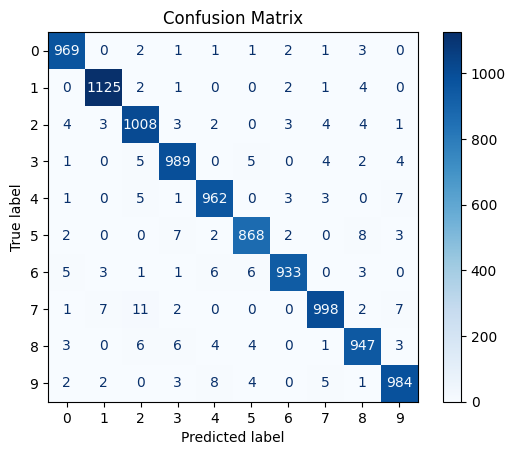

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = mlp.predict(X_test_flat)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_) #görselleştirme
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

